<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Iris.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Livecoding: Iris Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Multiclass classification | Identify a flower's class |

## Instructions with NBGrader removed

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## About the dataset

[Iris](https://archive.ics.uci.edu/ml/datasets/iris) is a well-known multiclass dataset. It contains 3 classes of flowers with 50 examples each. There are a total of 4 features for each flower.

![](./classic-datasets/images/Iris-versicolor-21_1.jpg)

## Package setups

In [1]:
#to debug package errors
import sys
sys.path
sys.executable

'C:\\ProgramData\\Anaconda3\\python.exe'

In [2]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate

#used for more advanced stuff below
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data

In [3]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = dataset.target
df_iris['class'] = dataset.target_names[dataset.target]
# Show 10 random samples
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


### Question
Find the X and y values we're looking for. Notice that y is categorical and thus, we could **one-hot encode it** if we are looking at **class** or we can just pick **target**. In order to one hot encode we have  to re-shape `y` it using the **.get_dummies** function. 

## For the purpose of this exercise, do not use hot encoding, go only for target but think about if you have to drop it somewhere or not...

In [4]:
# YOUR CODE HERE
X = df_iris.iloc[:,:-2]
Y = df_iris.iloc[:,-2]

X.shape, Y.shape

((150, 4), (150,))

## Step 2: Normalize the data in X

In [5]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Question

Is it better to store it on numpy or in an updated pandas dataframe? Numpy is more efficient while pandas is more visual. **pick whatever your prefer**

## Step 3: Train / Test Split

Store training input data in a variable named `x_train` and training targets in a variable named `y_train` with an **80/20 train/test split**.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)
print("X train: {}, X test: {}".format(X_train.shape, X_test.shape))
print("Y train: {}, Y test: {}".format(y_train.shape, y_test.shape))

X train: (120, 4), X test: (30, 4)
Y train: (120,), Y test: (30,)


In [7]:
print(f'X_train: {X_train.shape}. y_train: {y_train.shape}')
print(f'Labels: {y_train}')
assert X_train.shape == (120,4)
# only if we hot encode
# assert y_train.shape == (120,3)

X_train: (120, 4). y_train: (120,)
Labels: 22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int32


In [8]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 120
Number of observations in the test data: 30


## Step 4: Training a model

Train a model on the data to obtain a training accuracy > 93%. Store the training history in a variable named `history`.

For example, we can use **RandomForestClassifier** model to classify Irises. N_estimators increases model accuracy. Other options include:
- K-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifiers
- Naive Bayes
- Linear Discriminant Analysis
- Logistic Regression


In [9]:
### Random Foresst model

def rfc_model(X_train, y_train, X_test, y_test, random_state):
    rfc = RandomForestClassifier(random_state=random_state)
    rfc.fit(X_train, y_train)
    
    return rfc, rfc.score(X_test, y_test)



In [10]:
rfc, score = rfc_model(X_train, y_train, X_test, y_test, 0)

Now we can measure the accuracy with our **test set**

In [11]:
score

1.0

And now we can predict what a new input would look like...

In [12]:
rfc.predict([[3, 5, 4, 2]])

array([2])

can you build a table with each predicted value and its corresponding category in string?

In [13]:
results = rfc.predict(X_test[:10])

labels = []

for x in results:
    if x == 0:
        labels.append('setosa')
    elif x == 1:
        labels.append('versicolor')
    elif x == 2:
        labels.append('virginica')
        
table = pd.DataFrame([results, labels])
table.T

,0,1
0,1,versicolor
1,0,setosa
2,2,virginica
3,1,versicolor
4,1,versicolor
5,0,setosa
6,1,versicolor
7,2,virginica
8,1,versicolor
9,1,versicolor


## BONUS Step 5: Crossvalidation of the model
Our first model achived:  **Insert your % accuracy**!
- How do we know it is reproducible? 
- If we run the model again and our performance is 85%, which is correct? 
- And what about improving our model? Can you think of one thing we can do to potentially improve the model?

#### Crossvalidation
[Crossvalidation](https://machinelearningmastery.com/k-fold-cross-validation/) is when we create multiple X and y datasets. On each dataset we train and fit the model. We then average the results and return a 'crossvalidated' accuracy.

1. Initalize a new version of the model you trained above with the same paramters.
2. Use ```cross_validate()``` to run the model with 5 crossvalidation folds. 

In [14]:
#model with cross validation
#your code here

clf_cv = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

#cross validate the training set
cv = cross_validate(clf_cv, X_train, y_train, cv=5)

def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    #print out the mean of the cross validation
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

Crossvalidation fold: 0  Accruacy: 0.9583333333333334
Crossvalidation fold: 1  Accruacy: 1.0
Crossvalidation fold: 2  Accruacy: 0.875
Crossvalidation fold: 3  Accruacy: 1.0
Crossvalidation fold: 4  Accruacy: 0.9583333333333334
Mean train cross validation score 0.9583333333333334


## BONUS Step 6: Creating an end to end ML pipeline
**Congraulations you've trained, crossvalidated, predicted, and evaluated your first classifier**. Now that you understand the basic steps we will look at a way to combine all these steps together.

Before we go further think about what you would have to do if you **wanted to change the model**. Intalize a new model, change the variables, redo the cross validation...etc. Seems like a lot. And when we have to **change lots of code** it is **easy to make mistakes**. 
- And what if you wanted to try many models and see which one performed best? 
- Or try changing many different features? 
- How could you do it without writing each one out as we have?

The solution is to use **SKLearn's pipeline class**. A pipeline is an object that will execute the various steps in the machine learning process. We can choose what elements we want in the pipeline and those that we do not. Once setup, we can rapidly change models, or input data and have it return our results in an ordered way. Check out this [tutorial](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)


1. Initalize a scaler and a classifer object like we did previously.
2. Use the ```make_pipeline()``` function to construct a transofmraiton pipeline for the scaler and the classifier
3. Input the pipeline object to the cross_validator and evaluate with 5 folds.
4. Print out your results (hint: make a function for repetitve tasks like printing)

In [15]:
#define the scaler
scaler = StandardScaler();
#define the classifier
classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial');
#make the pipeline
pipe = make_pipeline(scaler, classifier);
#run the cross validation
scores = cross_validate(pipe, X, Y, cv=5);
#print results
print_scores(scores)

Crossvalidation fold: 0  Accruacy: 0.9666666666666667
Crossvalidation fold: 1  Accruacy: 1.0
Crossvalidation fold: 2  Accruacy: 0.9333333333333333
Crossvalidation fold: 3  Accruacy: 0.9
Crossvalidation fold: 4  Accruacy: 1.0
Mean train cross validation score 0.9600000000000002


## Advanced (don't expect you to do this yet)
Let's check how our model has learned

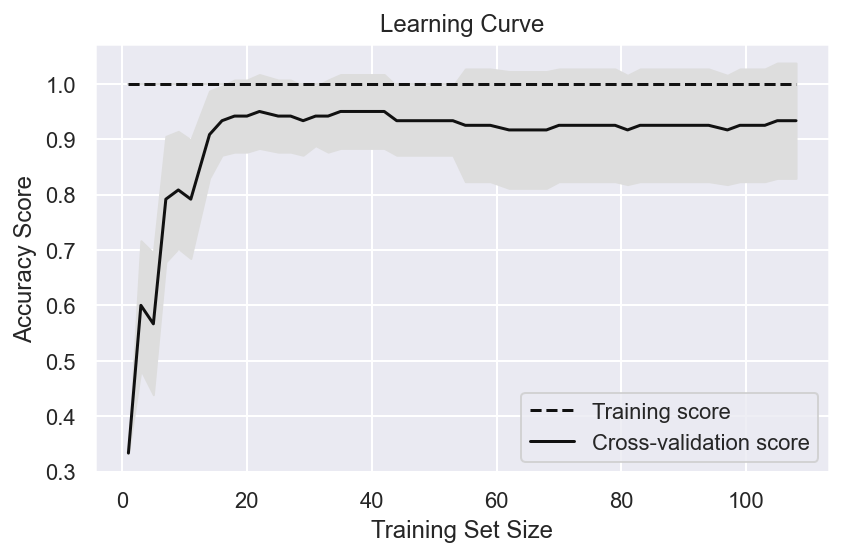

In [16]:
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Advanced: We can actually Fit with all classifiers and check the best performing classifier
Not required to do anything except figure out what values (X, y) you need to have in place for this to work...

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-18-7e972ec2cdb1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([m.__name__ for m in models], rotation='vertical')


[Text(0, 0, 'KNeighborsClassifier'),
 Text(1, 0, 'RandomForestClassifier'),
 Text(2, 0, 'MLPClassifier'),
 Text(3, 0, 'SVC'),
 Text(4, 0, 'GaussianProcessClassifier'),
 Text(5, 0, 'DecisionTreeClassifier'),
 Text(6, 0, 'AdaBoostClassifier'),
 Text(7, 0, 'GaussianNB'),
 Text(8, 0, 'QuadraticDiscriminantAnalysis')]

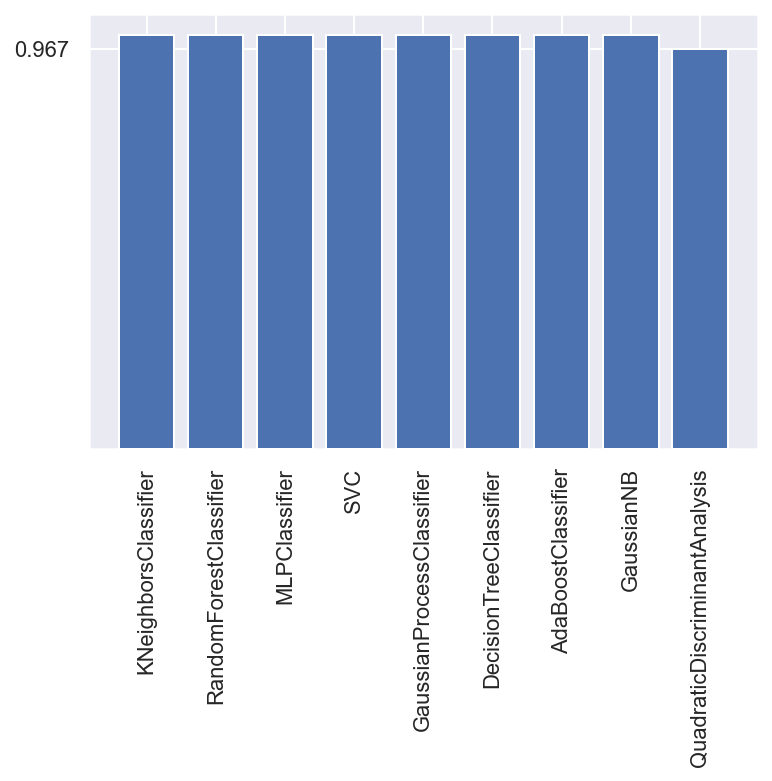

In [18]:
models = [
    KNeighborsClassifier, RandomForestClassifier, MLPClassifier, SVC, GaussianProcessClassifier,
    DecisionTreeClassifier, AdaBoostClassifier, GaussianNB, QuadraticDiscriminantAnalysis
]

accuracies = []
for model in models:
    clf = model().fit(X_train, y_train)
    accuracies.append(clf.score(X_test, y_test))

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
plt.bar([m.__name__ for m in models], accuracies)

ax.set_yticks(np.arange(min(accuracies), 1, 0.1))
ax.set_xticklabels([m.__name__ for m in models], rotation='vertical')

## Advanced Exercise

In this notebook we only used two features to predict the class of the flower. We also did not do any hypter parameter tuning. The challenge is to impove the prediction results. Some ideas we can try:
1. Add features to the input and run the cross validation pipeline
2. Investigate how to use ```GridSearchCV```, a powerful funtion that searches through hyperparmetrs and does cross validation.
    - Hint: Input the pipeline directly into GridSearchCV
3. Try a different models like RandomForest or SVM.

In [19]:
#your challenge code here
from sklearn.model_selection import GridSearchCV

In [20]:
params = {'logisticregression__penalty' : ['l2', 'none'],
         'logisticregression__C' : [0.1, 1, 10]}

In [21]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.231 (+/-0.478) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.231 (+/-0.478) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.878 (+/-0.049) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.231 (+/-0.478) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.968 (+/-0.067) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.878 (+/-0.049) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.978 (+/-0.089) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.968 (+/-0.067) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.964 (+/-0.081) for {'C': 1, 'kernel': 'linear'}
0.971 (+/-0.086) for {'C': 10, 'kernel': 'linear'}
0.964 (+/-0.081) for {'C': 100, 'kernel': 'linear'}
0.964 (+/-0.081) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.408 (+/-0.301) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.408 (+/-0.301) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.855 (+/-0.074) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.408 (+/-0.301) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.957 (+/-0.091) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.855 (+/-0.074) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.967 (+/-0.133) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.957 (+/-0.091) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.122) for {'C': 1, 'kernel': 'linear'}
0.957 (+/-0.129) for {'C': 10, 'kernel': 'linear'}
0.949 (+/-0.122) for {'C': 100, 'kernel': 'linear'}
0.949 (+/-0.122) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

*Note the problem is **too easy**: the hyperparameter plateau is too flat and the
output model is the same for precision and recall with ties in quality.*